Import Modules

In [1]:
import pandas as pd
import numpy as np
import random
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [3]:

Jotstar_content_consumption = pd.read_csv('datasets/Jotstar_content_consumption.csv')

Jotstar_contents = pd.read_csv('datasets/Jotstar_contents.csv')

Jotstar_subscribers = pd.read_csv('datasets/Jotstar_subscribers.csv')

Liocinema_content_consumption = pd.read_csv('datasets/liocinema_content_consumption.csv')

Liocinema_contents = pd.read_csv('datasets/liocinema_contents.csv')

Liocinema_subscribers = pd.read_csv('datasets/liocinema_subscribers.csv')

# Total Users & Growth Trends 
What is the total number of users for LioCinema and Jotstar, and how do they 
compare in terms of growth trends (January–November 2024)?

In [4]:
# convert the datatype of the subscription data column 
Jotstar_subscribers['subscription_date'] = pd.to_datetime(Jotstar_subscribers['subscription_date'])
Liocinema_subscribers['subscription_date'] = pd.to_datetime(Liocinema_subscribers['subscription_date'])


In [5]:
# groupby the data value by the subscription data and count how many users have subscribed in that month

Jotstar_subscribers_tot = Jotstar_subscribers.groupby('subscription_date')['user_id'].count().reset_index()
liocinema_subscribers_tot = Liocinema_subscribers.groupby('subscription_date')['user_id'].count().reset_index()

In [6]:
# merge both the dataset 
Total_user_per_month = pd.merge(Jotstar_subscribers_tot,liocinema_subscribers_tot, on = 'subscription_date')
Total_user_per_month = Total_user_per_month.rename(columns={'user_id_x':'Jotstar_users','user_id_y':'Liocinema_users'})

In [7]:
# group by month only to know total user on both platform for each month
Total_user_per_month['month'] = Total_user_per_month['subscription_date'].dt.to_period('M')
Total_user_per_month_df = Total_user_per_month.groupby('month')[['Jotstar_users','Liocinema_users']].sum().reset_index()
Total_user_per_month_df


,month,Jotstar_users,Liocinema_users
0,2024-01,3934,6758
1,2024-02,3939,7404
2,2024-03,3954,8397
3,2024-04,3984,9759
4,2024-05,3998,11977
5,2024-06,4020,13768
6,2024-07,4067,16161
7,2024-08,4103,19247
8,2024-09,4163,23873
9,2024-10,4196,29105


In [8]:
# change the shape of the dataset
Total_user_per_month_df = Total_user_per_month_df.melt(id_vars='month', value_vars=['Jotstar_users', 'Liocinema_users'], var_name='platform_users', value_name='users')
Total_user_per_month_df

,month,platform_users,users
0,2024-01,Jotstar_users,3934
1,2024-02,Jotstar_users,3939
2,2024-03,Jotstar_users,3954
3,2024-04,Jotstar_users,3984
4,2024-05,Jotstar_users,3998
5,2024-06,Jotstar_users,4020
6,2024-07,Jotstar_users,4067
7,2024-08,Jotstar_users,4103
8,2024-09,Jotstar_users,4163
9,2024-10,Jotstar_users,4196


In [9]:
sns.set_theme(rc={'figure.figsize': (14, 4)})
sns.set_style("white")


Text(0.5, 1.0, 'Total Users & Growth Trends')

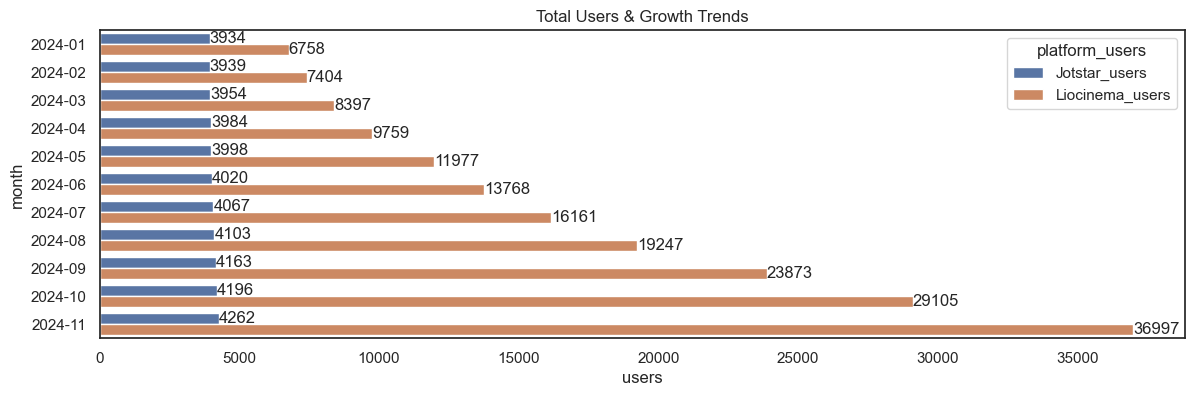

In [10]:
ax = sns.barplot(data=Total_user_per_month_df, x='users', y='month', hue='platform_users',orient='h')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Total Users & Growth Trends')


# Content Library Comparison 
What is the total number of contents available on LioCinema vs. Jotstar? How do 
they differ in terms of language and content type?

In [11]:
# Group the data by content_type and lanaguage provide in both the platform

Jotstar_contents_tot = Jotstar_contents.groupby(['content_type','language'])['content_id'].count().reset_index()
liocinema_contents_tot = Liocinema_contents.groupby(['content_type','language'])['content_id'].count().reset_index()

In [12]:
# Merge both of the dataset using outer - to ensure all of the row are their in the result even if it has not match in another table.

content_library_comparison = pd.merge(Jotstar_contents_tot,liocinema_contents_tot, on = ['content_type', 'language'], how='outer')

content_library_comparison = content_library_comparison.rename(columns={'content_id_x':'Jotstar', 'content_id_y':'Liocinema'})
content_library_comparison.fillna(0)

,content_type,language,Jotstar,Liocinema
0,Movie,Bengali,35,0.0
1,Movie,English,359,40.0
2,Movie,Gujarati,11,0.0
3,Movie,Hindi,295,280.0
4,Movie,Kannada,70,81.0
5,Movie,Malayalam,70,90.0
6,Movie,Marathi,47,49.0
7,Movie,Punjabi,11,0.0
8,Movie,Tamil,141,171.0
9,Movie,Telugu,141,189.0


CONTENT BY LANGUAGE

In [13]:
content_library_comparison_plot = content_library_comparison.groupby('language')[['Jotstar','Liocinema']].sum().reset_index()
content_library_comparison_plot

,language,Jotstar,Liocinema
0,Bengali,60,0.0
1,English,800,56.0
2,Gujarati,28,0.0
3,Hindi,637,424.0
4,Kannada,121,118.0
5,Malayalam,118,121.0
6,Marathi,74,68.0
7,Punjabi,27,0.0
8,Tamil,251,221.0
9,Telugu,244,242.0


[Text(0, 0, '60'),
 Text(0, 0, '800'),
 Text(0, 0, '28'),
 Text(0, 0, '637'),
 Text(0, 0, '121'),
 Text(0, 0, '118'),
 Text(0, 0, '74'),
 Text(0, 0, '27'),
 Text(0, 0, '251'),
 Text(0, 0, '244')]

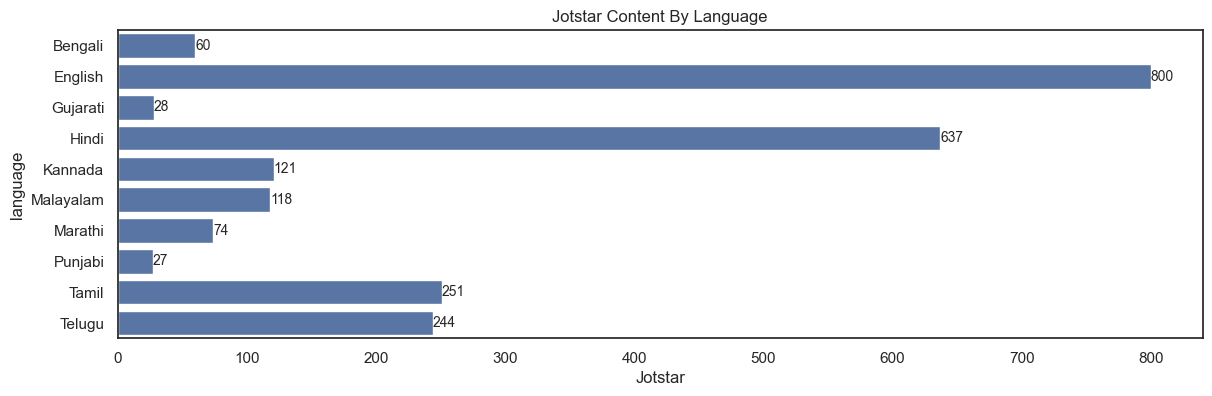

In [14]:
jotstar_ax = sns.barplot(content_library_comparison_plot,x=content_library_comparison_plot.Jotstar,y = 'language', orient='h')
plt.title('Jotstar Content By Language')
jotstar_ax.bar_label(jotstar_ax.containers[0], fontsize=10)


Text(0.5, 1.0, 'Liocinema Content By Language')

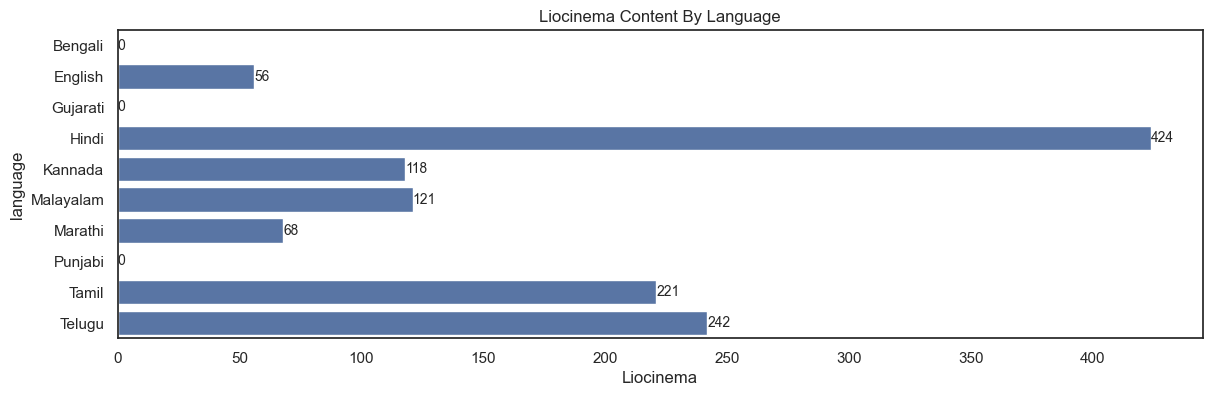

In [15]:
liocinema_ax = sns.barplot(content_library_comparison_plot,x=content_library_comparison_plot.Liocinema,y = 'language', orient='h')
liocinema_ax.bar_label(liocinema_ax.containers[0], fontsize=10)
plt.title('Liocinema Content By Language')


CONTENT BY CONTENT TYPE

In [16]:
content_library_comparison_plot = content_library_comparison.groupby('content_type')[['Jotstar','Liocinema']].sum().reset_index()
content_library_comparison_plot

,content_type,Jotstar,Liocinema
0,Movie,1180,900.0
1,Series,826,300.0
2,Sports,354,50.0


In [17]:
# change the shape of the dataset
content_library_comparison_plot = content_library_comparison_plot.melt(id_vars='content_type', value_vars=['Jotstar', 'Liocinema'], var_name='platform_users', value_name='users')
content_library_comparison_plot

,content_type,platform_users,users
0,Movie,Jotstar,1180.0
1,Series,Jotstar,826.0
2,Sports,Jotstar,354.0
3,Movie,Liocinema,900.0
4,Series,Liocinema,300.0
5,Sports,Liocinema,50.0


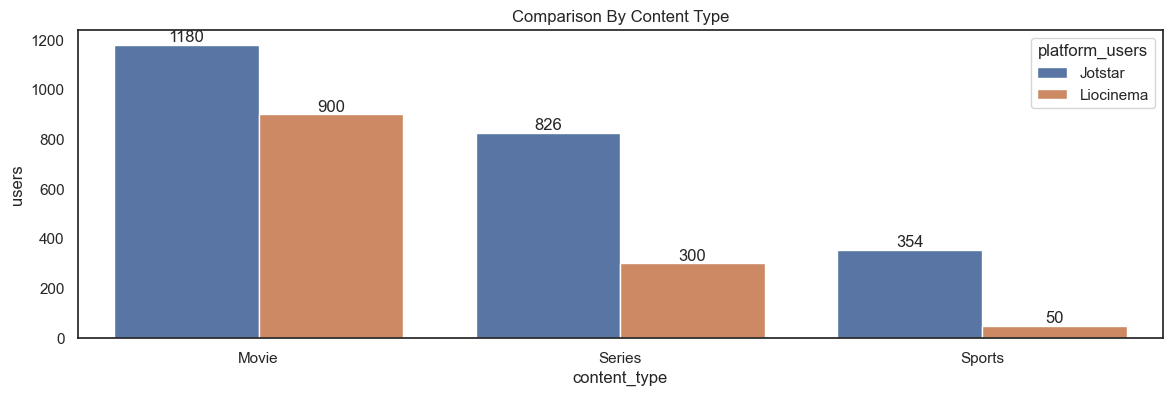

In [18]:
ax = sns.barplot(data=content_library_comparison_plot, x='content_type', y='users', hue='platform_users')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Comparison By Content Type')
plt.show()

# User Demographics 
What is the distribution of users by age group, city tier, and subscription plan for each platform ?

In [19]:
Jotstar_subscribers_demo_tot  = Jotstar_subscribers.groupby(['age_group','city_tier','subscription_plan'])['user_id'].count().reset_index()
liocinema_subscribers_demo_tot = Liocinema_subscribers.groupby(['age_group','city_tier','subscription_plan'])['user_id'].count().reset_index()

In [20]:
user_demographics = pd.merge(Jotstar_subscribers_demo_tot, liocinema_subscribers_demo_tot, on = ['age_group','city_tier','subscription_plan'],how='outer')

user_demographics = user_demographics.rename(columns={'user_id_x':'Jotstar_users','user_id_y':'Liocinema_users'})

user_demographics['Total_users'] = user_demographics.Jotstar_users + user_demographics.Liocinema_users

user_demographics = user_demographics.fillna(0)
user_demographics.head()

,age_group,city_tier,subscription_plan,Jotstar_users,Liocinema_users,Total_users
0,18-24,Tier 1,Basic,0.0,5297.0,0.0
1,18-24,Tier 1,Free,916.0,8126.0,9042.0
2,18-24,Tier 1,Premium,1773.0,4577.0,6350.0
3,18-24,Tier 1,VIP,1704.0,0.0,0.0
4,18-24,Tier 2,Basic,0.0,9924.0,0.0


DISTRIBUTION OF USERS BY AGE GROUP

In [21]:
user_demographics_age_group = user_demographics.groupby('age_group')[['Jotstar_users','Liocinema_users']].sum().reset_index()
user_demographics_age_group

,age_group,Jotstar_users,Liocinema_users
0,18-24,7676.0,79813.0
1,25-34,20069.0,52027.0
2,35-44,11274.0,32560.0
3,45+,5601.0,19046.0


DISTRIBUTION OF USERS BY SUBSCRIPTION PLAN

In [22]:
user_demographics_jotstar = user_demographics.groupby('subscription_plan')['Jotstar_users'].sum().reset_index().drop(index=0).reset_index(drop=True)
user_demographics_jotstar

,subscription_plan,Jotstar_users
0,Free,12096.0
1,Premium,13367.0
2,VIP,19157.0


In [23]:
user_demographics_liocinema = user_demographics.groupby('subscription_plan')['Liocinema_users'].sum().reset_index().drop(index=3).reset_index(drop=True)
user_demographics_liocinema

,subscription_plan,Liocinema_users
0,Basic,53362.0
1,Free,104992.0
2,Premium,25092.0


DISTRIBUTION OF USERS BY CITY TIER

In [24]:
user_demographics_city_tier = user_demographics.groupby('city_tier')[['Jotstar_users','Liocinema_users']].sum().reset_index()
user_demographics_city_tier

,city_tier,Jotstar_users,Liocinema_users
0,Tier 1,25451.0,41011.0
1,Tier 2,13424.0,63848.0
2,Tier 3,5745.0,78587.0


<Axes: title={'center': 'User Demographics by City Tier on Jotstar'}, xlabel='city_tier', ylabel='Jotstar_users'>

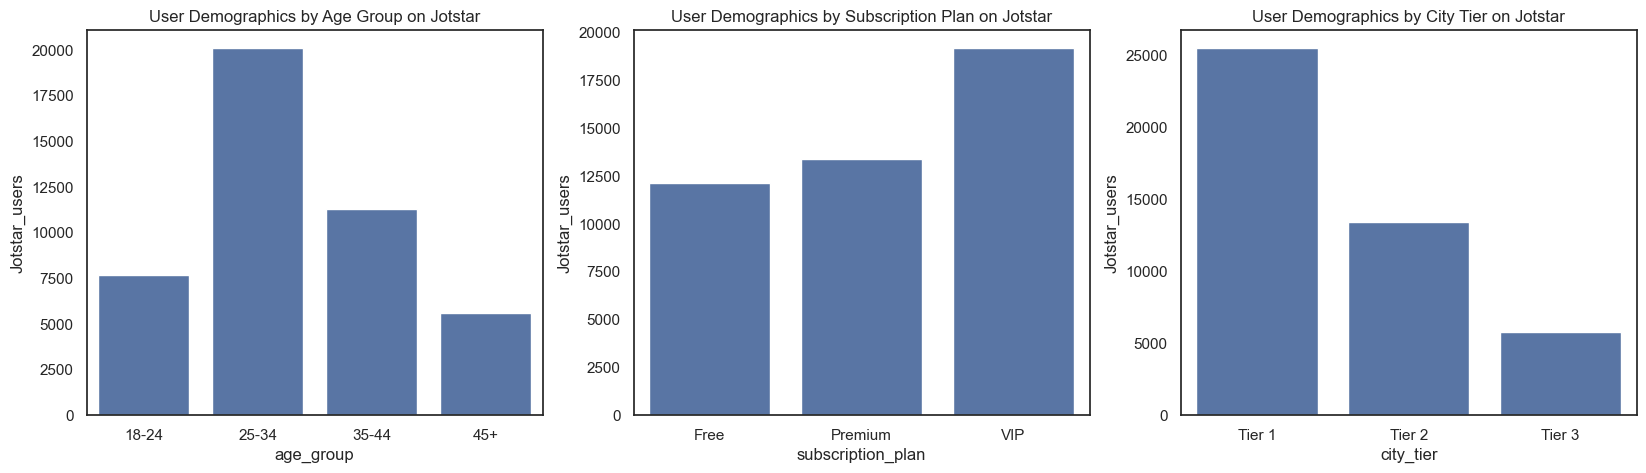

In [25]:
%matplotlib inline
sns.set_theme(rc={'figure.figsize': (20, 5)})
sns.set_style("white")
plt.subplot(1, 3, 1)
plt.title("User Demographics by Age Group on Jotstar")
sns.barplot(data = user_demographics_age_group, x = 'age_group', y='Jotstar_users')
plt.subplot(1, 3, 2)
plt.title("User Demographics by Subscription Plan on Jotstar")
sns.barplot(data = user_demographics_jotstar, x = 'subscription_plan', y='Jotstar_users')
plt.subplot(1, 3, 3)
plt.title("User Demographics by City Tier on Jotstar")
sns.barplot(data = user_demographics_city_tier, x = 'city_tier', y='Jotstar_users')




<Axes: title={'center': 'User Demographics by City Tier on Liocinema'}, xlabel='city_tier', ylabel='Liocinema_users'>

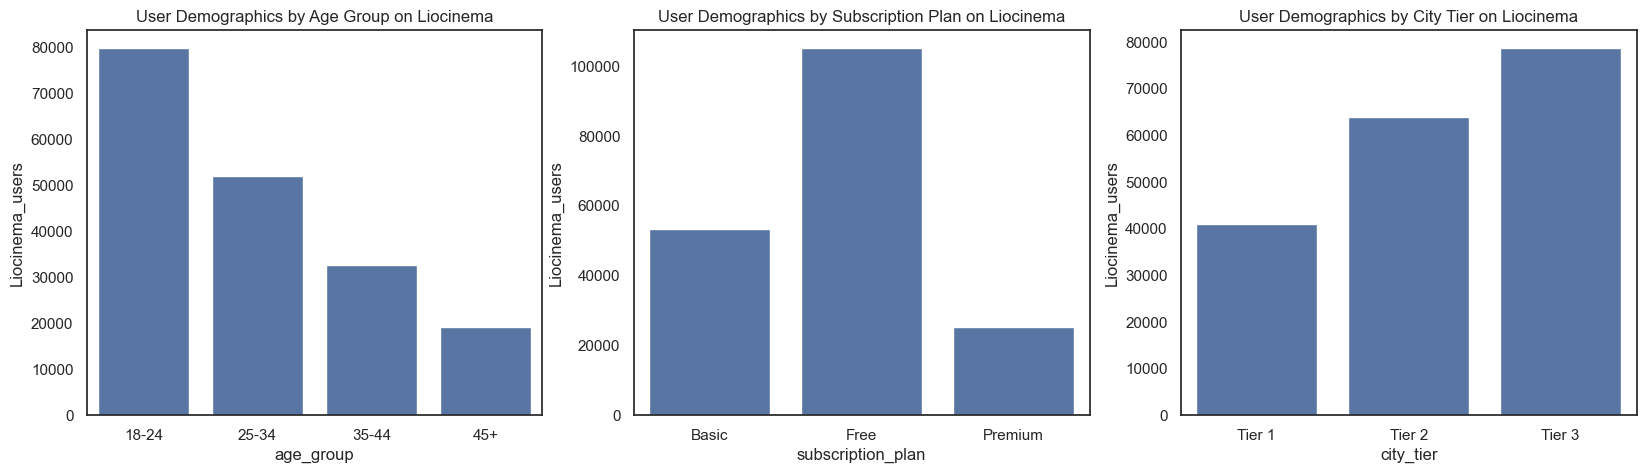

In [26]:

plt.subplot(1, 3, 1)
plt.title("User Demographics by Age Group on Liocinema")
sns.barplot(data = user_demographics_age_group, x = 'age_group', y='Liocinema_users')
plt.subplot(1, 3, 2)
plt.title("User Demographics by Subscription Plan on Liocinema")
sns.barplot(data = user_demographics_liocinema, x = 'subscription_plan', y='Liocinema_users')
plt.subplot(1, 3, 3)
plt.title("User Demographics by City Tier on Liocinema")
sns.barplot(data = user_demographics_city_tier, x = 'city_tier', y='Liocinema_users')


# Active vs. Inactive Users 
What percentage of LioCinema and Jotstar users are active vs. inactive? How do 
these rates vary by age group and subscription plan?

In [27]:
# convert the datatype of last actve date from object to datetime

Jotstar_subscribers['last_active_date'] = pd.to_datetime(Jotstar_subscribers['last_active_date'])   

Liocinema_subscribers['last_active_date'] = pd.to_datetime(Liocinema_subscribers['last_active_date'])

In [28]:
# For Jotstar and Liocinema if the date is given then it has the user lastactive that otherwise inactive

Jotstar_subscribers['is_active'] = Jotstar_subscribers['last_active_date'].isnull()
Liocinema_subscribers['is_active'] = Liocinema_subscribers['last_active_date'].isnull()

TOTAL ACTIVE & INACTIVE USERS

In [29]:
Jotstar_subscribers_is_active = Jotstar_subscribers.groupby('is_active')['user_id'].count().reset_index()

Jotstar_subscribers_is_active['percent'] = round((Jotstar_subscribers_is_active.user_id / sum(Jotstar_subscribers_is_active.user_id) ) * 100)

Jotstar_subscribers_is_active = Jotstar_subscribers_is_active.rename(columns={'user_id': 'Total Users','percent':'Total Percentage'})

Jotstar_subscribers_is_active['is_active'] = Jotstar_subscribers_is_active['is_active'].map({False: 'Inactive Users', True: 'Active Users'})
Jotstar_subscribers_is_active


,is_active,Total Users,Total Percentage
0,Inactive Users,6652,15.0
1,Active Users,37968,85.0


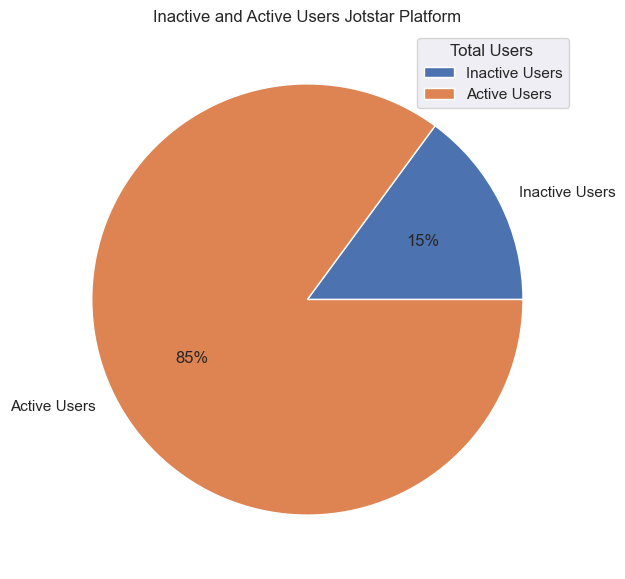

In [30]:
sns.set_theme(rc={'figure.figsize': (7, 7)})
plt.pie(x = Jotstar_subscribers_is_active['Total Users'], labels=Jotstar_subscribers_is_active.is_active,autopct='%1.0f%%')
plt.legend(title = 'Total Users ')
plt.title('Inactive and Active Users Jotstar Platform')
plt.show()

In [31]:
Liocinema_subscribers_is_active = Liocinema_subscribers.groupby('is_active')['user_id'].count().reset_index()

Liocinema_subscribers_is_active['percent'] = round((Liocinema_subscribers_is_active.user_id /sum(Liocinema_subscribers_is_active.user_id) ) * 100)

Liocinema_subscribers_is_active = Liocinema_subscribers_is_active.rename(columns={'user_id': 'Total Users','percent':'Total Percentage'})

Liocinema_subscribers_is_active['is_active'] = Liocinema_subscribers_is_active['is_active'].map({False: 'Inactive Users', True: 'Active Users'})

Liocinema_subscribers_is_active

,is_active,Total Users,Total Percentage
0,Inactive Users,82305,45.0
1,Active Users,101141,55.0


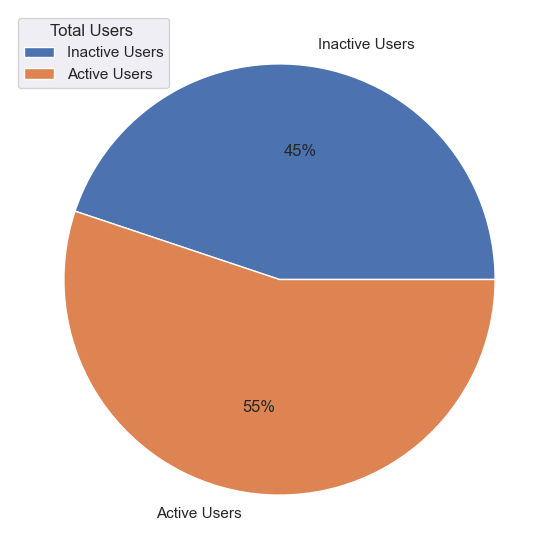

In [32]:
plt.pie(x = Liocinema_subscribers_is_active['Total Users'], labels=Liocinema_subscribers_is_active.is_active,autopct='%1.0f%%')
plt.legend(title = 'Total Users ')
plt.show()

ACTIVE & INACTIVE USER BY AGE GROUP

In [33]:
# Group by age_group and is_active
jotstar_age = Jotstar_subscribers.groupby(['age_group', 'is_active'])['user_id'].count().reset_index()

jotstar_age = jotstar_age.rename(columns={'user_id':'Total Users'})

jotstar_age['is_active'] = jotstar_age['is_active'].map({False: 'Inactive Users', True: 'Active Users'})

total_by_age = jotstar_age.groupby('age_group')['Total Users'].transform('sum')


jotstar_age['Percentage'] = (jotstar_age['Total Users'] / total_by_age * 100).round(2)

jotstar_age

,age_group,is_active,Total Users,Percentage
0,18-24,Inactive Users,1197,15.59
1,18-24,Active Users,6479,84.41
2,25-34,Inactive Users,3125,15.57
3,25-34,Active Users,16944,84.43
4,35-44,Inactive Users,1586,14.07
5,35-44,Active Users,9688,85.93
6,45+,Inactive Users,744,13.28
7,45+,Active Users,4857,86.72


Text(0.5, 1.0, ' Active & Inactive Users of Jotstar Platform based on Age Group')

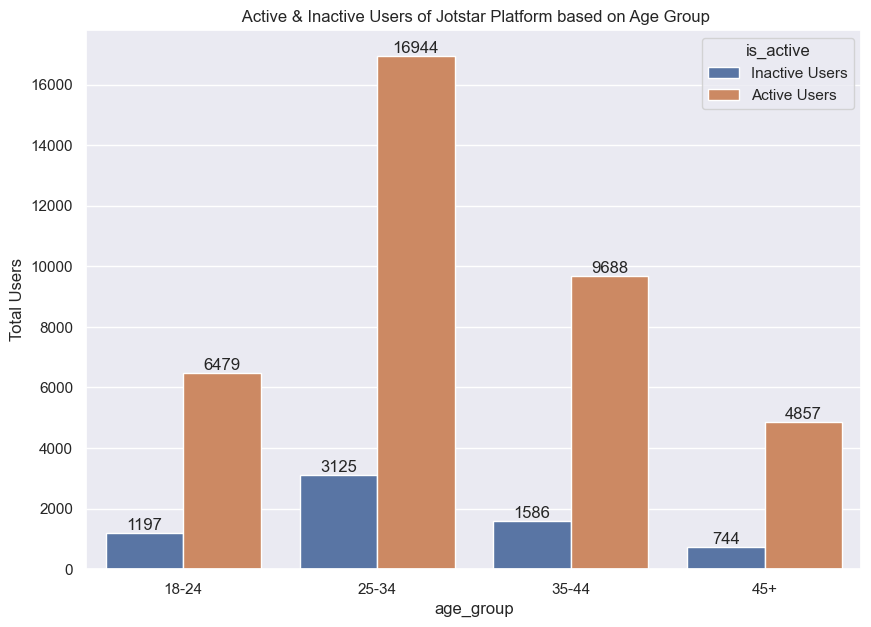

In [34]:
sns.set_theme(rc={'figure.figsize': (10, 7)})

ax = sns.barplot(data=jotstar_age, x=jotstar_age.age_group, y=jotstar_age['Total Users'], hue=jotstar_age['is_active'])
for i in ax.containers:
    ax.bar_label(i,)
plt.title(' Active & Inactive Users of Jotstar Platform based on Age Group')


In [35]:
liocinema_age = Liocinema_subscribers.groupby(['age_group', 'is_active'])['user_id'].count().reset_index()

liocinema_age = liocinema_age.rename(columns={'user_id':'Total Users'})

liocinema_age['is_active'] = liocinema_age['is_active'].map({False: 'Inactive Users', True: 'Active Users'})


total_by_age_liocinema = liocinema_age.groupby('age_group')['Total Users'].transform('sum')

liocinema_age['Percentage'] = (liocinema_age['Total Users'] / total_by_age_liocinema * 100).round(2)

liocinema_age

,age_group,is_active,Total Users,Percentage
0,18-24,Inactive Users,39173,49.08
1,18-24,Active Users,40640,50.92
2,25-34,Inactive Users,22136,42.55
3,25-34,Active Users,29891,57.45
4,35-44,Inactive Users,13556,41.63
5,35-44,Active Users,19004,58.37
6,45+,Inactive Users,7440,39.06
7,45+,Active Users,11606,60.94


Text(0.5, 1.0, ' Active & Inactive Users of Liocinema Platform based on Age Group')

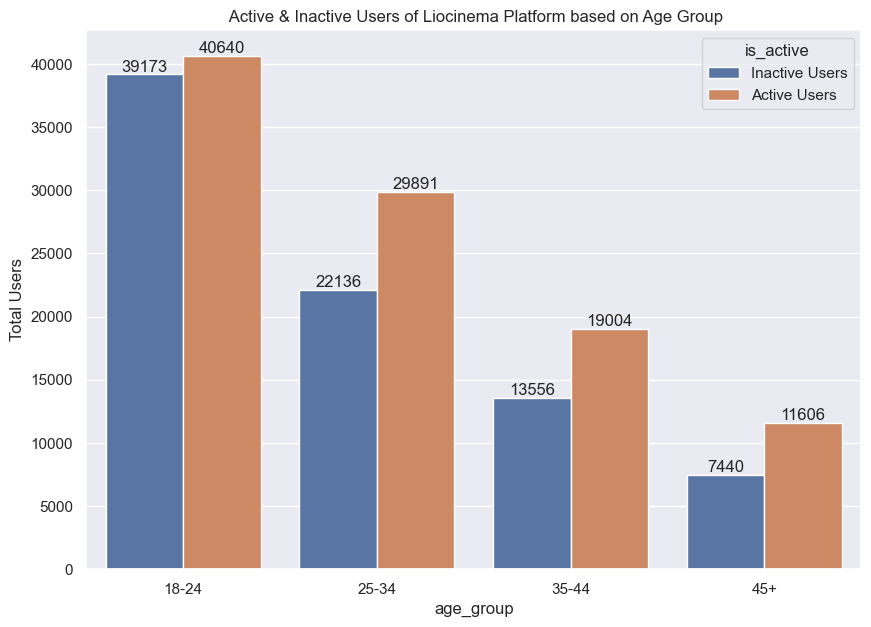

In [36]:
ax = sns.barplot(data=liocinema_age, x=liocinema_age.age_group, y=liocinema_age['Total Users'], hue=liocinema_age['is_active'])
for i in ax.containers:
    ax.bar_label(i,)
plt.title(' Active & Inactive Users of Liocinema Platform based on Age Group')


ACTIVE AND INACTIVE USERS BASED ON SUBSCRIPTION PLAN

In [37]:
jotstar_plan = Jotstar_subscribers.groupby(['subscription_plan', 'is_active'])['user_id'].count().reset_index()

jotstar_plan = jotstar_plan.rename(columns={'user_id':'Total Users'})

jotstar_plan['is_active'] = jotstar_plan['is_active'].map({False: 'Inactive Users', True: 'Active Users'})


total_by_plan = jotstar_plan.groupby('subscription_plan')['Total Users'].transform('sum')


jotstar_plan['Percentage'] = (jotstar_plan['Total Users'] / total_by_plan * 100).round(2)


jotstar_plan

,subscription_plan,is_active,Total Users,Percentage
0,Free,Inactive Users,3113,25.74
1,Free,Active Users,8983,74.26
2,Premium,Inactive Users,901,6.74
3,Premium,Active Users,12466,93.26
4,VIP,Inactive Users,2638,13.77
5,VIP,Active Users,16519,86.23


Text(0.5, 0, 'Subscription Plan')

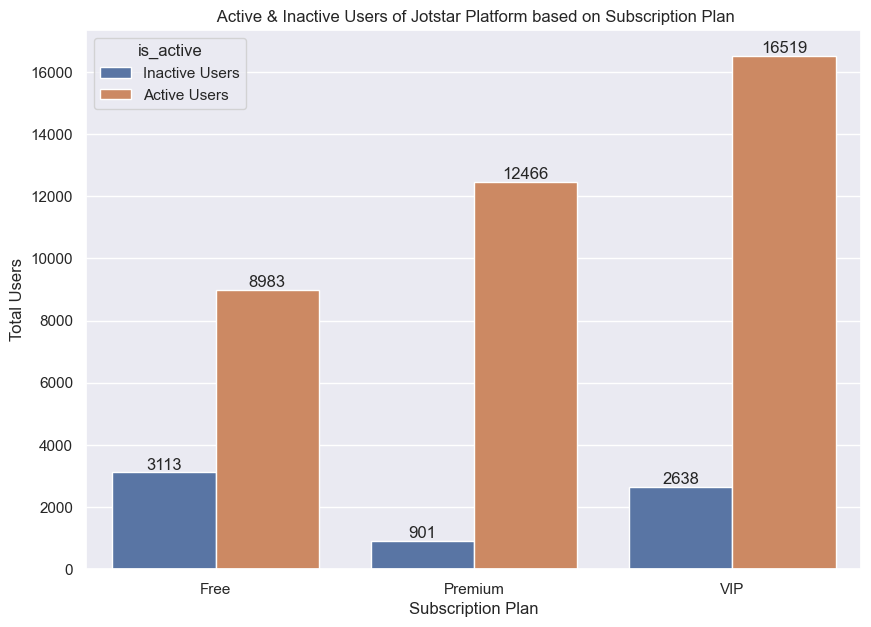

In [38]:
ax = sns.barplot(data=jotstar_plan, x=jotstar_plan['subscription_plan'], y=jotstar_plan['Total Users'], hue=jotstar_plan['is_active'])
for i in ax.containers:
    ax.bar_label(i,)
plt.title(' Active & Inactive Users of Jotstar Platform based on Subscription Plan')
plt.xlabel('Subscription Plan')


In [39]:
liocinema_plan = Liocinema_subscribers.groupby(['subscription_plan', 'is_active'])['user_id'].count().reset_index()

liocinema_plan = liocinema_plan.rename(columns={'user_id':'Total Users'})

liocinema_plan['is_active'] = liocinema_plan['is_active'].map({False: 'Inactive Users', True: 'Active Users'})


total_by_plan_liocinema = liocinema_plan.groupby('subscription_plan')['Total Users'].transform('sum')


liocinema_plan['Percentage'] = (liocinema_plan['Total Users'] / total_by_plan_liocinema * 100).round(2)


liocinema_plan

,subscription_plan,is_active,Total Users,Percentage
0,Basic,Inactive Users,18029,33.79
1,Basic,Active Users,35333,66.21
2,Free,Inactive Users,59793,56.95
3,Free,Active Users,45199,43.05
4,Premium,Inactive Users,4483,17.87
5,Premium,Active Users,20609,82.13


Text(0.5, 0, 'Subscription Plan')

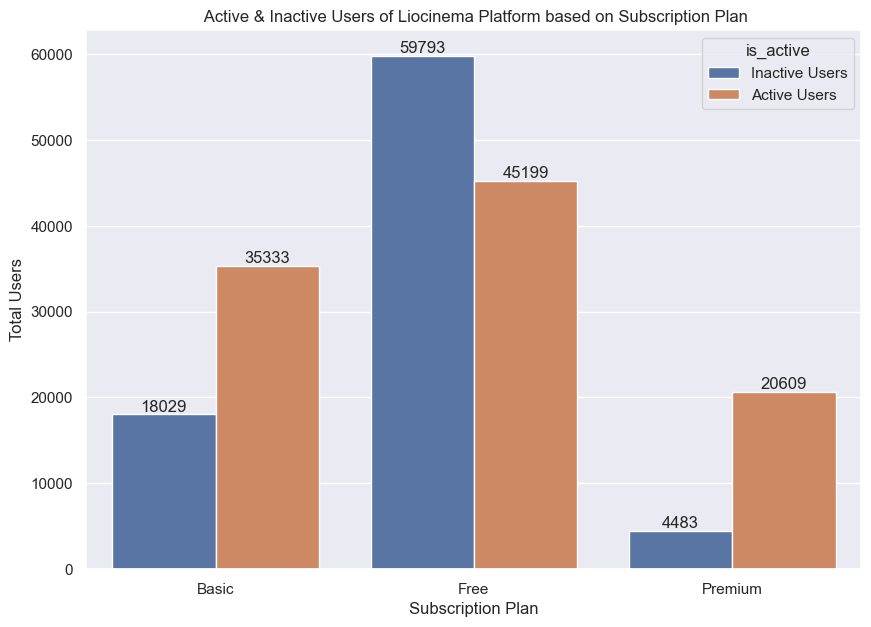

In [40]:
ax = sns.barplot(data=liocinema_plan, x=liocinema_plan['subscription_plan'], y=liocinema_plan['Total Users'], hue=liocinema_plan['is_active'])
for i in ax.containers:
    ax.bar_label(i,)
plt.title(' Active & Inactive Users of Liocinema Platform based on Subscription Plan')
plt.xlabel('Subscription Plan')

# Watch Time Analysis
What is the average watch time for LioCinema vs. Jotstar during the analysis period? 
How do these compare by city tier and device type?

In [41]:
# each user_id must be using different devices with different watch time

jotstar_time_analysis_df = pd.merge(Jotstar_content_consumption,Jotstar_subscribers, on='user_id')
jotstar_time_analysis_df.head()

,user_id,device_type,total_watch_time_mins,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan,is_active
0,UIDJS877cc0e02c9,Mobile,14613,45+,Tier 1,2024-04-05,VIP,NaT,NaN,NaN,True
1,UIDJS06384e7ff06,Mobile,13271,25-34,Tier 1,2024-05-21,Premium,NaT,NaN,NaN,True
2,UIDJSc3997b7beb7,Mobile,4644,18-24,Tier 3,2024-07-14,VIP,2024-11-12,NaN,NaN,False
3,UIDJS66726ce2325,Mobile,5734,18-24,Tier 1,2024-10-09,Premium,NaT,NaN,NaN,True
4,UIDJS040119b6107,Mobile,2939,35-44,Tier 1,2024-10-15,Free,NaT,2024-11-15,VIP,True


In [42]:
liocinema_time_analysis_df = pd.merge(Liocinema_content_consumption, Liocinema_subscribers, on = 'user_id',how='outer')
liocinema_time_analysis_df.head()

,user_id,device_type,total_watch_time_mins,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan,is_active
0,UIDLC00000bea68a,Mobile,1029,25-34,Tier 3,2024-10-24,Free,NaT,NaN,NaN,True
1,UIDLC00000bea68a,TV,134,25-34,Tier 3,2024-10-24,Free,NaT,NaN,NaN,True
2,UIDLC00000bea68a,Laptop,153,25-34,Tier 3,2024-10-24,Free,NaT,NaN,NaN,True
3,UIDLC00009202848,Mobile,4012,18-24,Tier 1,2024-09-18,Basic,NaT,NaN,NaN,True
4,UIDLC00009202848,TV,879,18-24,Tier 1,2024-09-18,Basic,NaT,NaN,NaN,True


AVERAGE WATCH TIME BY PLATFORM

In [43]:
# Total watch time of each user 
Jotstar_tot_watch_time = jotstar_time_analysis_df.groupby('user_id')['total_watch_time_mins'].sum().reset_index()
print('Avg watch time on Jotstar platform: ')
var_Jotstar_tot_watch_time = Jotstar_tot_watch_time.total_watch_time_mins.mean().round()
var_Jotstar_tot_watch_time

Avg watch time on Jotstar platform: 


21104.0

In [44]:
# Total watch time of each user 
Liocinema_tot_watch_time = liocinema_time_analysis_df.groupby('user_id')['total_watch_time_mins'].sum().reset_index()
print('Avg watch time on Liocinema platform: ')
var_Liocinema_tot_watch_time = Liocinema_tot_watch_time.total_watch_time_mins.mean().round()
var_Liocinema_tot_watch_time

Avg watch time on Liocinema platform: 


3609.0

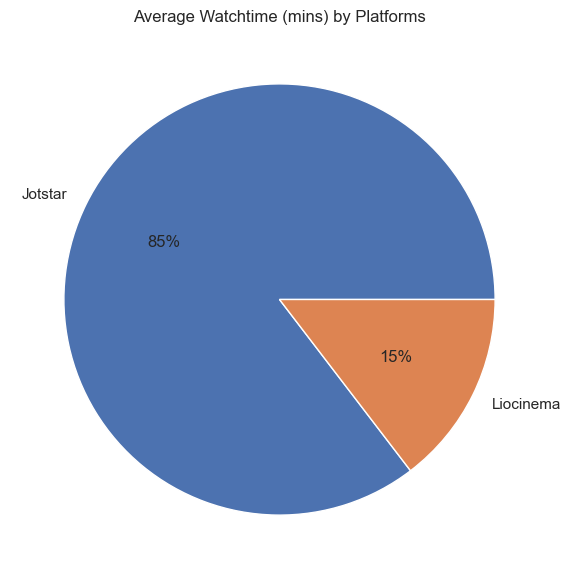

In [45]:
plt.pie(x=[var_Jotstar_tot_watch_time,var_Liocinema_tot_watch_time], labels=['Jotstar','Liocinema'], autopct='%1.0f%%')
plt.title('Average Watchtime (mins) by Platforms')
plt.show()


AVERAGE WATCH TIME BY DEVICE TYPE

In [46]:
Jostar_avg_watching_device_time = jotstar_time_analysis_df.groupby(['user_id','device_type'])['total_watch_time_mins'].sum().reset_index()

Jostar_avg_watching_device_time_df = Jostar_avg_watching_device_time.groupby('device_type')['total_watch_time_mins'].mean().round(2).reset_index()
Jostar_avg_watching_device_time_df

,device_type,total_watch_time_mins
0,Laptop,4857.26
1,Mobile,10563.65
2,TV,5682.62


In [47]:
Liocinema_avg_watching_device_time  = liocinema_time_analysis_df.groupby(['user_id','device_type'])['total_watch_time_mins'].sum().reset_index()

Liocinema_avg_watching_device_time_df = Liocinema_avg_watching_device_time.groupby('device_type')['total_watch_time_mins'].mean().round(2).reset_index()


In [48]:
Device_Watch_Time_Analysis_df = pd.merge(Jostar_avg_watching_device_time_df,Liocinema_avg_watching_device_time_df,on='device_type')

Device_Watch_Time_Analysis_df = Device_Watch_Time_Analysis_df.rename(columns={'total_watch_time_mins_x':'Jotstar Avg Watch Time', 'total_watch_time_mins_y':'Liocinema Avg Watch Time'})
Device_Watch_Time_Analysis_df

,device_type,Jotstar Avg Watch Time,Liocinema Avg Watch Time
0,Laptop,4857.26,495.21
1,Mobile,10563.65,2763.05
2,TV,5682.62,759.29


<Axes: title={'center': 'Total Watch Time (mins) by Device Type on Liocinema'}, xlabel='device_type', ylabel='total_watch_time_mins'>

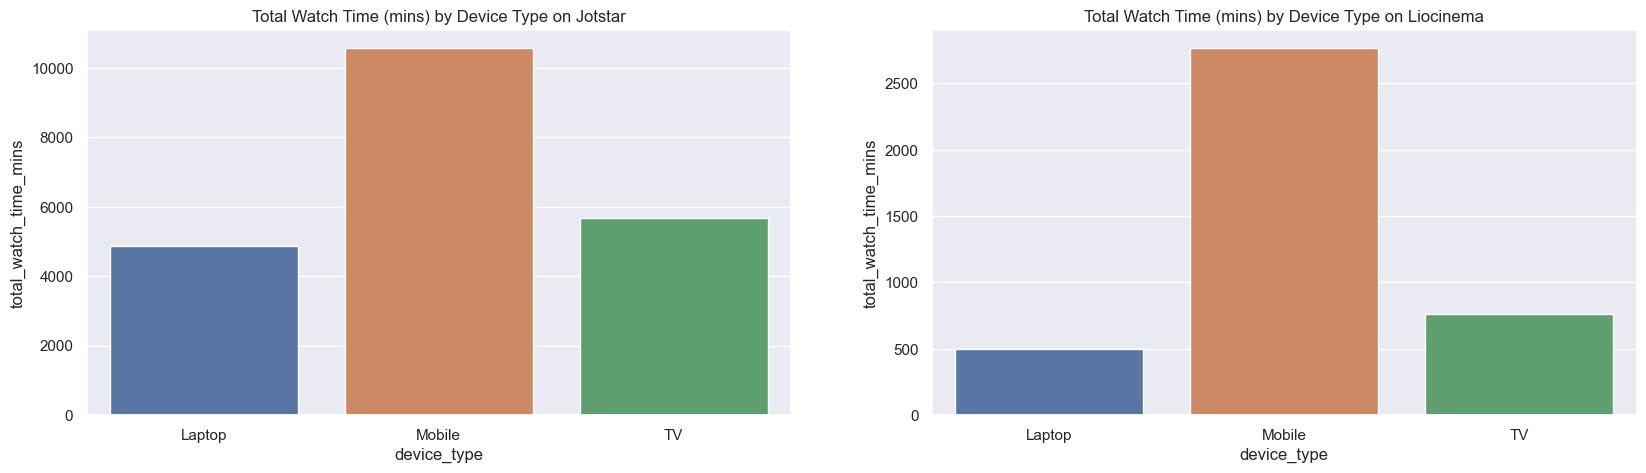

In [49]:
sns.set_theme(rc={'figure.figsize': (20, 5)})
plt.subplot(1,2,1)
plt.title('Total Watch Time (mins) by Device Type on Jotstar')
sns.barplot(data=Jostar_avg_watching_device_time_df, x='device_type',y='total_watch_time_mins', hue='device_type')
plt.subplot(1,2,2)
plt.title('Total Watch Time (mins) by Device Type on Liocinema')
sns.barplot(data=Liocinema_avg_watching_device_time_df, x='device_type',y='total_watch_time_mins', hue='device_type')

AVERAGE WATCH TIME BY CITY TIER

In [50]:
Jostar_avg_watch_city_tier_time = jotstar_time_analysis_df.groupby(['user_id','city_tier'])['total_watch_time_mins'].sum().reset_index()

Jostar_avg_watch_city_tier_time = Jostar_avg_watch_city_tier_time.groupby('city_tier')['total_watch_time_mins'].mean().round(2).reset_index()


In [51]:
Liocinema_avg_watch_city_tier_time  = liocinema_time_analysis_df.groupby(['user_id','city_tier'])['total_watch_time_mins'].sum().reset_index()

Liocinema_avg_watch_city_tier_time = Liocinema_avg_watch_city_tier_time.groupby('city_tier')['total_watch_time_mins'].mean().round(2).reset_index()


In [52]:
City_Watch_Time_Analysis_df = pd.merge(Jostar_avg_watch_city_tier_time, Liocinema_avg_watch_city_tier_time, on='city_tier')

City_Watch_Time_Analysis_df = City_Watch_Time_Analysis_df.rename(columns={'total_watch_time_mins_x':'Jotstar Avg Watch Time', 'total_watch_time_mins_y':'Liocinema Avg Watch Time'})

City_Watch_Time_Analysis_df

,city_tier,Jotstar Avg Watch Time,Liocinema Avg Watch Time
0,Tier 1,23650.96,5401.53
1,Tier 2,18901.01,4045.51
2,Tier 3,14964.61,2318.10


<Axes: title={'center': 'Total Watch Time (mins) by Device Type on Liocinema'}, xlabel='city_tier', ylabel='total_watch_time_mins'>

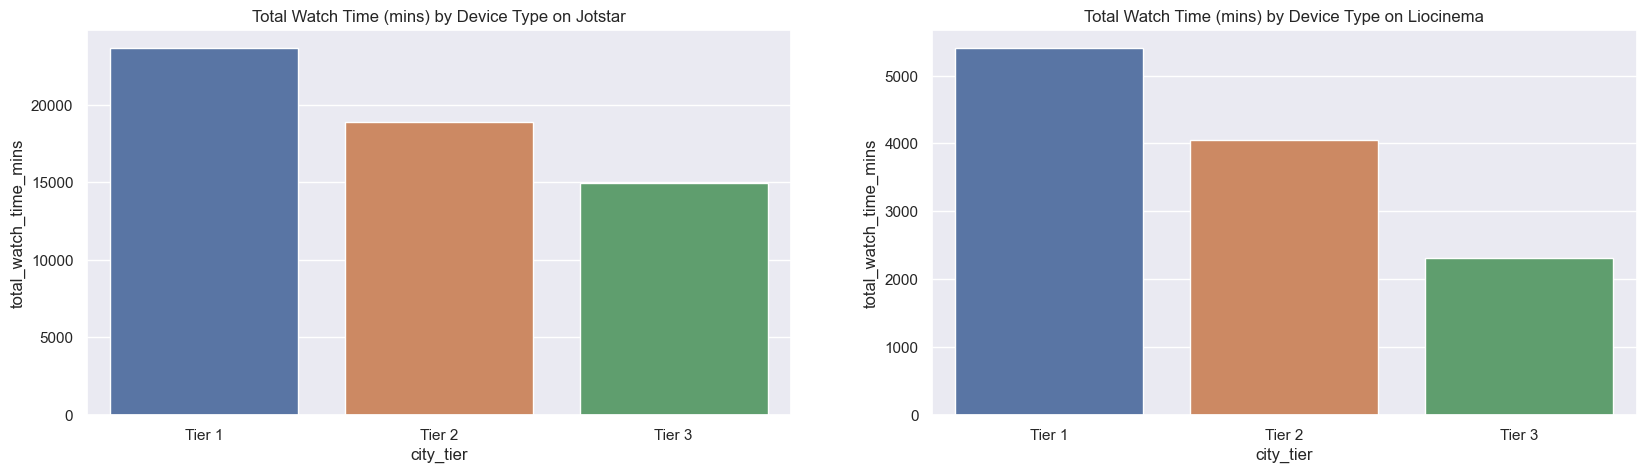

In [53]:
sns.set_theme(rc={'figure.figsize': (20, 5)})
plt.subplot(1,2,1)
plt.title('Total Watch Time (mins) by Device Type on Jotstar')
sns.barplot(data=Jostar_avg_watch_city_tier_time, x='city_tier',y='total_watch_time_mins', hue='city_tier')
plt.subplot(1,2,2)
plt.title('Total Watch Time (mins) by Device Type on Liocinema')
sns.barplot(data=Liocinema_avg_watch_city_tier_time, x='city_tier',y='total_watch_time_mins', hue='city_tier')

# Inactivity Correlation
How do inactivity patterns correlate with total watch time or average watch time? Are less engaged users more likely to become inactive?

In [54]:
# get unique user id and their watch time 
Jotstar_inactivity_correlation = jotstar_time_analysis_df.groupby(['user_id','is_active'])['total_watch_time_mins'].sum().dropna().reset_index()
Jotstar_inactivity_correlation.head()

,user_id,is_active,total_watch_time_mins
0,UIDJS0000751588f,True,40127
1,UIDJS000093eeb86,True,3868
2,UIDJS00010d7fa1e,True,9913
3,UIDJS00013411a85,True,21797
4,UIDJS0003a3f54cf,True,11531


In [55]:
Jotstar_inactivity_correlation[Jotstar_inactivity_correlation['is_active']== True]['total_watch_time_mins'].mean() + Jotstar_inactivity_correlation[Jotstar_inactivity_correlation['is_active']== False]['total_watch_time_mins'].mean()


29677.773796695332

In [56]:
jotstar_tot_user = Jotstar_inactivity_correlation.user_id.count()
jotstar_active_user = Jotstar_inactivity_correlation.is_active.sum()
jotstar_inactive_user = jotstar_tot_user - jotstar_active_user 
jotstar_inactive_user_watch_time = Jotstar_inactivity_correlation.groupby('is_active')['total_watch_time_mins'].mean().round()[False]
jotstar_active_user_watch_time = Jotstar_inactivity_correlation.groupby('is_active')['total_watch_time_mins'].mean().round()[True]


In [57]:
Liocinema_inactivity_correlation = liocinema_time_analysis_df.groupby(['user_id','is_active'])['total_watch_time_mins'].sum().dropna().reset_index()


In [58]:
liocinema_tot_user = Liocinema_inactivity_correlation.user_id.count()
liocinema_active_user = Liocinema_inactivity_correlation.is_active.sum()
liocinema_inactive_user = liocinema_tot_user - liocinema_active_user
liocinema_active_user_watch_time = Liocinema_inactivity_correlation.groupby('is_active')['total_watch_time_mins'].mean().round()[True]
liocinema_inactive_user_watch_time = Liocinema_inactivity_correlation.groupby('is_active')['total_watch_time_mins'].mean().round()[False]

In [59]:
Platform_inactivity_correlation_df  = pd.DataFrame({
    'Platform':['Jotstar','Liocinema'],
    'Total Users':[jotstar_tot_user, liocinema_tot_user],
    'Total Active Users':[jotstar_active_user, liocinema_active_user],
    'Total Inactive Users':[jotstar_inactive_user, liocinema_inactive_user],
    'Total Watch Time (mins) on Platform': [var_Jotstar_tot_watch_time,var_Liocinema_tot_watch_time],
    'Watch Time (mins) Active Users':[jotstar_active_user_watch_time,liocinema_active_user_watch_time],
    'Watch Time (mins) Inactive Users':[jotstar_inactive_user_watch_time,liocinema_inactive_user_watch_time]
})

Platform_inactivity_correlation_df

,Platform,Total Users,Total Active Users,Total Inactive Users,Total Watch Time (mins) on Platform,Watch Time (mins) Active Users,Watch Time (mins) Inactive Users
0,Jotstar,44620,37968,6652,21104.0,23765.0,5913.0
1,Liocinema,183446,101141,82305,3609.0,5642.0,1110.0


# Downgrade Trends
How do downgrade trends differ between LioCinema and Jotstar? Are downgrades 
more prevalent on one platform compared to the other?

In [60]:
Liocinema_subscribers_downgrade = Liocinema_subscribers.groupby(['subscription_plan','new_subscription_plan'])['user_id'].count().reset_index().drop(index=[1,2,3]).reset_index(drop=True)

Liocinema_subscribers_downgrade

,subscription_plan,new_subscription_plan,user_id
0,Basic,Free,10309
1,Premium,Basic,3111
2,Premium,Free,7439


In [61]:
# premium > VIP 
Jotstar_subscribers_downgrade = Jotstar_subscribers.groupby(['subscription_plan','new_subscription_plan'])['user_id'].count().reset_index().drop(index=[0,1,5]).reset_index(drop=True)

Jotstar_subscribers_downgrade

,subscription_plan,new_subscription_plan,user_id
0,Premium,Free,225
1,Premium,VIP,368
2,VIP,Free,2149


In [62]:
Platform_downgrade_df = pd.DataFrame(
    {
    'Platform':['Jotstar','Liocinema'],
    'Downgrades':[Jotstar_subscribers_downgrade.user_id.sum(),
                    Liocinema_subscribers_downgrade.user_id.sum()],
    'Total Users':[jotstar_tot_user,liocinema_tot_user],
    'Downgrade Rate':[((Jotstar_subscribers_downgrade.user_id.sum()/jotstar_tot_user)*100).round(2),((Liocinema_subscribers_downgrade.user_id.sum()/liocinema_tot_user)*100).round(2)]
    
    }
)
Platform_downgrade_df

,Platform,Downgrades,Total Users,Downgrade Rate
0,Jotstar,2742,44620,6.15
1,Liocinema,20859,183446,11.37


# Upgrade Patterns 
What are the most common upgrade transitions (e.g., Free to Basic, Free to VIP, Free to Premium) for LioCinema and Jotstar? How do these differ across platforms?

In [63]:
plan_tiers = {'VIP': 3, 'Premium': 2, 'Basic': 1, 'Free': 0}

# Filter plan change records
# 1. the plan chage date should not be null and the old plan < new changed plan
Liocinema_upgrades = Liocinema_subscribers[
    (Liocinema_subscribers['plan_change_date'].notna()) &
    (Liocinema_subscribers['subscription_plan'].map(plan_tiers) < Liocinema_subscribers['new_subscription_plan'].map(plan_tiers))
].reset_index()

Liocinema_upgrades.head(3)

,index,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan,is_active
0,8,UIDLC00044bbb294,25-34,Tier 2,2024-04-09,Free,NaT,2024-09-09,Basic,True
1,16,UIDLC0007b26e5f0,25-34,Tier 1,2024-07-27,Basic,NaT,2024-09-27,Premium,True
2,21,UIDLC0008d7e1bd3,35-44,Tier 1,2024-07-04,Basic,NaT,2024-11-04,Premium,True


In [64]:
Liocinema_subscribers_upgrade = Liocinema_upgrades.groupby(['subscription_plan','new_subscription_plan'])['user_id'].count().reset_index()
Liocinema_subscribers_upgrade

,subscription_plan,new_subscription_plan,user_id
0,Basic,Premium,1362
1,Free,Basic,2078
2,Free,Premium,715


In [65]:
# premium > VIP 

plan_tiers2 = {'Premium': 2, 'VIP': 1, 'Free': 0}

Jotstar_upgrades = Jotstar_subscribers[
    (Jotstar_subscribers['plan_change_date'].notna()) &
    (Jotstar_subscribers['subscription_plan'].map(plan_tiers2) < Jotstar_subscribers['new_subscription_plan'].map(plan_tiers2))
].reset_index()

Jotstar_upgrades.head()

,index,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan,is_active
0,76,UIDJS006315e24bf,45+,Tier 1,2024-01-04,Free,NaT,2024-03-04,Premium,True
1,81,UIDJS006711c9331,25-34,Tier 1,2024-05-22,Free,NaT,2024-06-22,VIP,True
2,88,UIDJS00753e2f5d5,25-34,Tier 3,2024-04-04,VIP,NaT,2024-05-04,Premium,True
3,89,UIDJS007b5054731,25-34,Tier 1,2024-03-19,Free,NaT,2024-09-19,VIP,True
4,94,UIDJS0084cfde42c,35-44,Tier 1,2024-02-13,VIP,NaT,2024-03-13,Premium,True


In [66]:
Jotstar_subscribers_upgrade = Jotstar_upgrades.groupby(['subscription_plan','new_subscription_plan'])['user_id'].count().reset_index()
Jotstar_subscribers_upgrade

,subscription_plan,new_subscription_plan,user_id
0,Free,Premium,683
1,Free,VIP,844
2,VIP,Premium,2821


In [67]:
Platform_upgrade_df = pd.DataFrame(
    {
    'Platform':['Jotstar','Liocinema'],
    'Upgrades':[Jotstar_subscribers_upgrade.user_id.sum(),
                    Liocinema_subscribers_upgrade.user_id.sum()],
    'Total Users':[jotstar_tot_user,liocinema_tot_user],
    'Upgrade Rate':[((Jotstar_subscribers_upgrade.user_id.sum()/jotstar_tot_user)*100).round(2),((Liocinema_subscribers_upgrade.user_id.sum()/liocinema_tot_user)*100).round(2)]
    
    }
)
Platform_upgrade_df

,Platform,Upgrades,Total Users,Upgrade Rate
0,Jotstar,4348,44620,9.74
1,Liocinema,4155,183446,2.26


# Paid Users Distribution 
How does the paid user percentage (e.g., Basic, Premium for LioCinema; VIP, Premium for Jotstar) vary across different platforms? Analyse the proportion of premium users in Tier 1, Tier 2, and Tier 3 cities and identify any notable trends or differences.

In [68]:
Jotstar_paid_user = Jotstar_subscribers.groupby(['city_tier','subscription_plan'])['user_id'].count().unstack()
Jotstar_paid_user = Jotstar_paid_user.drop(columns=['Free'])
Jotstar_paid_user['Total User'] = Jotstar_subscribers.groupby('city_tier')['user_id'].count()
Jotstar_paid_user['(VIP + Premium)'] = Jotstar_paid_user.Premium + Jotstar_paid_user.VIP
Jotstar_paid_user['Paid user %'] = (Jotstar_paid_user['(VIP + Premium)'] / Jotstar_paid_user['Total User'] * 100).round(2)
Jotstar_paid_user['VIP Plan %'] = (Jotstar_paid_user['VIP'] / Jotstar_paid_user['Total User'] * 100).round(2)
Jotstar_paid_user['Premium Plan %'] = (Jotstar_paid_user['Premium'] / Jotstar_paid_user['Total User'] * 100).round(2)

Jotstar_paid_user


subscription_plan,Premium,VIP,Total User,(VIP + Premium),Paid user %,VIP Plan %,Premium Plan %
city_tier,,,,,,,
Tier 1,10178,10162,25451,20340,79.92,39.93,39.99
Tier 2,2566,6794,13424,9360,69.73,50.61,19.12
Tier 3,623,2201,5745,2824,49.16,38.31,10.84


In [69]:
Liocinema_paid_user = Liocinema_subscribers.groupby(['city_tier','subscription_plan'])['user_id'].count().unstack()
Liocinema_paid_user = Liocinema_paid_user.drop(columns=['Free'])
Liocinema_paid_user['Total User'] = Liocinema_subscribers.groupby('city_tier')['user_id'].count()
Liocinema_paid_user['(Basic + Premium)'] = Liocinema_paid_user.Basic + Liocinema_paid_user.Premium
Liocinema_paid_user['Paid user %'] = (Liocinema_paid_user['(Basic + Premium)'] / Liocinema_paid_user['Total User'] * 100).round(2)
Liocinema_paid_user['Basic Plan %'] = (Liocinema_paid_user['Basic'] / Liocinema_paid_user['Total User'] * 100).round(2)
Liocinema_paid_user['Premium Plan %'] = (Liocinema_paid_user['Premium'] / Liocinema_paid_user['Total User'] * 100).round(2)
Liocinema_paid_user

subscription_plan,Basic,Premium,Total User,(Basic + Premium),Paid user %,Basic Plan %,Premium Plan %
city_tier,,,,,,,
Tier 1,12293,10306,41011,22599,55.10,29.97,25.13
Tier 2,22570,9090,63848,31660,49.59,35.35,14.24
Tier 3,18499,5696,78587,24195,30.79,23.54,7.25


# Revenue Analysis 
Assume the following monthly subscription prices, calculate the total revenue generated by both platforms (LioCinema and Jotstar) for the analysis period (January to November 2024). 

The calculation should consider: 
- Subscribers count under each plan. 
- Active duration of subscribers on their respective plans. 
- Upgrades and downgrades during the period, ensuring revenue reflects the time spent under each plan. 

In [70]:
# Monthly Subscription Prices
Liocinema_basic_plan = 96
Liocinema_premium_plan = 129
Jotstar_vip_plan = 159
Jotstar_premium_plan = 359

Month = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}

## Jotstar Revenue Analysis

In [71]:
Jotstar_subscribers_revenue = Jotstar_subscribers.copy().drop(columns=['is_active'])

# create a columns or latest subscription plan of all the users
Jotstar_subscribers_revenue['latest_subscription_plan'] = np.where(Jotstar_subscribers_revenue['new_subscription_plan'].isna(), Jotstar_subscribers_revenue['subscription_plan'], Jotstar_subscribers_revenue['new_subscription_plan'])

Jotstar_subscribers_revenue.head(10)

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan,latest_subscription_plan
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,NaT,NaN,NaN,Premium
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,NaT,NaN,NaN,Free
2,UIDJS00010d7fa1e,25-34,Tier 1,2024-08-08,Free,NaT,NaN,NaN,Free
3,UIDJS00013411a85,35-44,Tier 2,2024-05-31,VIP,NaT,NaN,NaN,VIP
4,UIDJS0003a3f54cf,35-44,Tier 1,2024-09-20,Premium,NaT,NaN,NaN,Premium
5,UIDJS0003c1e814d,45+,Tier 1,2024-09-29,Free,NaT,NaN,NaN,Free
6,UIDJS0005148a254,18-24,Tier 1,2024-11-10,Premium,NaT,NaN,NaN,Premium
7,UIDJS00053f36fed,25-34,Tier 1,2024-03-07,Premium,NaT,NaN,NaN,Premium
8,UIDJS00054eb2210,25-34,Tier 3,2024-04-12,Premium,NaT,NaN,NaN,Premium
9,UIDJS0005f952957,25-34,Tier 3,2024-09-29,VIP,2024-12-02,NaN,NaN,VIP


In [72]:
# those user who are active that is either the are active given a certain date in the last active date or they have changed the plan so plan date is last active sate 
Jotstar_subscribers_revenue['plan_change_date'] = pd.to_datetime(Jotstar_subscribers_revenue['plan_change_date'])

''' For end date the logic is if the last active date is not present for some users 
1. They must have logged in for changing plan so take that date 
2. For others the last active date would be the end date of november '''

Jotstar_subscribers_revenue['subscription_end_date'] = np.where(Jotstar_subscribers_revenue['last_active_date'].isna(),np.datetime64('2024-11-30'),Jotstar_subscribers_revenue['last_active_date'])


# an active months columns 
Jotstar_subscribers_revenue['Active_Months'] = (Jotstar_subscribers_revenue['subscription_end_date'].dt.month - Jotstar_subscribers_revenue['subscription_date'].dt.month) + 1
Jotstar_subscribers_revenue.head(10)

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan,latest_subscription_plan,subscription_end_date,Active_Months
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,NaT,NaT,NaN,Premium,2024-11-30,6
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,NaT,NaT,NaN,Free,2024-11-30,1
2,UIDJS00010d7fa1e,25-34,Tier 1,2024-08-08,Free,NaT,NaT,NaN,Free,2024-11-30,4
3,UIDJS00013411a85,35-44,Tier 2,2024-05-31,VIP,NaT,NaT,NaN,VIP,2024-11-30,7
4,UIDJS0003a3f54cf,35-44,Tier 1,2024-09-20,Premium,NaT,NaT,NaN,Premium,2024-11-30,3
5,UIDJS0003c1e814d,45+,Tier 1,2024-09-29,Free,NaT,NaT,NaN,Free,2024-11-30,3
6,UIDJS0005148a254,18-24,Tier 1,2024-11-10,Premium,NaT,NaT,NaN,Premium,2024-11-30,1
7,UIDJS00053f36fed,25-34,Tier 1,2024-03-07,Premium,NaT,NaT,NaN,Premium,2024-11-30,9
8,UIDJS00054eb2210,25-34,Tier 3,2024-04-12,Premium,NaT,NaT,NaN,Premium,2024-11-30,8
9,UIDJS0005f952957,25-34,Tier 3,2024-09-29,VIP,2024-12-02,NaT,NaN,VIP,2024-12-02,4


In [73]:
plan_tiers

{'VIP': 3, 'Premium': 2, 'Basic': 1, 'Free': 0}

In [74]:
# check the plan status whether it is upgraded , downgraded or not change at all
Jotstar_subscribers_revenue['plan_change_status'] = np.where(
    (Jotstar_subscribers_revenue['new_subscription_plan'].notna()) & 
    (Jotstar_subscribers_revenue['subscription_plan'].map(plan_tiers) < 
     Jotstar_subscribers_revenue['new_subscription_plan'].map(plan_tiers)),
    'Upgrade',
    np.where(
        (Jotstar_subscribers_revenue['new_subscription_plan'].notna()) & 
        (Jotstar_subscribers_revenue['subscription_plan'].map(plan_tiers) > 
         Jotstar_subscribers_revenue['new_subscription_plan'].map(plan_tiers)),
        'Downgrade',
        'No Change'
    )
)
Jotstar_subscribers_revenue.head(20)

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan,latest_subscription_plan,subscription_end_date,Active_Months,plan_change_status
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,NaT,NaT,NaN,Premium,2024-11-30,6,No Change
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,NaT,NaT,NaN,Free,2024-11-30,1,No Change
2,UIDJS00010d7fa1e,25-34,Tier 1,2024-08-08,Free,NaT,NaT,NaN,Free,2024-11-30,4,No Change
3,UIDJS00013411a85,35-44,Tier 2,2024-05-31,VIP,NaT,NaT,NaN,VIP,2024-11-30,7,No Change
4,UIDJS0003a3f54cf,35-44,Tier 1,2024-09-20,Premium,NaT,NaT,NaN,Premium,2024-11-30,3,No Change
5,UIDJS0003c1e814d,45+,Tier 1,2024-09-29,Free,NaT,NaT,NaN,Free,2024-11-30,3,No Change
6,UIDJS0005148a254,18-24,Tier 1,2024-11-10,Premium,NaT,NaT,NaN,Premium,2024-11-30,1,No Change
7,UIDJS00053f36fed,25-34,Tier 1,2024-03-07,Premium,NaT,NaT,NaN,Premium,2024-11-30,9,No Change
8,UIDJS00054eb2210,25-34,Tier 3,2024-04-12,Premium,NaT,NaT,NaN,Premium,2024-11-30,8,No Change
9,UIDJS0005f952957,25-34,Tier 3,2024-09-29,VIP,2024-12-02,NaT,NaN,VIP,2024-12-02,4,No Change


In [75]:
# Subscribers count under each plan. 
Jotstar_subscribers_revenue.groupby('latest_subscription_plan')['user_id'].count().reset_index()


,latest_subscription_plan,user_id
0,Free,12943
1,Premium,16278
2,VIP,15399


In [76]:
# Active duration of subscribers on their respective plans. 
# how many users were active for how many months 
Jotstar_subscribers_revenue.groupby(['latest_subscription_plan','Active_Months',])['user_id'].count().unstack().fillna(0).drop(index=['Free']).reset_index()

Active_Months,latest_subscription_plan,1,2,3,4,5,6,7,8,9,10,11,12
0,Premium,1394,1579,1639,1476,1504,1429,1436,1473,1425,1484,1434,5
1,VIP,1532,2108,1988,1545,1412,1367,1210,1148,1077,1015,981,16


In [77]:
# Upgrades and downgrades during the period, ensuring revenue reflects the time spent under each plan. 
Jotstar_Revenue_Analysis = Jotstar_subscribers_revenue.groupby(['plan_change_status','Active_Months','latest_subscription_plan'])['user_id'].count().unstack().fillna(0).drop(columns=['Free']).reset_index()
Jotstar_Revenue_Analysis

latest_subscription_plan,plan_change_status,Active_Months,Premium,VIP
0,Downgrade,1,137.0,0.0
1,Downgrade,2,161.0,0.0
2,Downgrade,3,189.0,0.0
3,Downgrade,4,207.0,0.0
4,Downgrade,5,226.0,0.0
5,Downgrade,6,239.0,0.0
6,Downgrade,7,261.0,0.0
7,Downgrade,8,311.0,0.0
8,Downgrade,9,312.0,0.0
9,Downgrade,10,364.0,0.0


In [78]:
Jotstar_Revenue_Analysis['Monthly Premium Price'] = Jotstar_Revenue_Analysis['Premium']*Jotstar_premium_plan
Jotstar_Revenue_Analysis['Monthly VIP Price'] = Jotstar_Revenue_Analysis['VIP']*Jotstar_vip_plan
# users  + the price they pay * for how many months they were active 
Jotstar_Revenue_Analysis['Total Revenue'] = (Jotstar_Revenue_Analysis['Monthly Premium Price'] + Jotstar_Revenue_Analysis['Monthly VIP Price'])* Jotstar_Revenue_Analysis['Active_Months']
Jotstar_Revenue_Analysis['Month Name'] = Jotstar_Revenue_Analysis['Active_Months'].map(Month)

Jotstar_Revenue_Analysis

latest_subscription_plan,plan_change_status,Active_Months,Premium,VIP,Monthly Premium Price,Monthly VIP Price,Total Revenue,Month Name
0,Downgrade,1,137.0,0.0,49183.0,0.0,49183.0,January
1,Downgrade,2,161.0,0.0,57799.0,0.0,115598.0,February
2,Downgrade,3,189.0,0.0,67851.0,0.0,203553.0,March
3,Downgrade,4,207.0,0.0,74313.0,0.0,297252.0,April
4,Downgrade,5,226.0,0.0,81134.0,0.0,405670.0,May
5,Downgrade,6,239.0,0.0,85801.0,0.0,514806.0,June
6,Downgrade,7,261.0,0.0,93699.0,0.0,655893.0,July
7,Downgrade,8,311.0,0.0,111649.0,0.0,893192.0,August
8,Downgrade,9,312.0,0.0,112008.0,0.0,1008072.0,September
9,Downgrade,10,364.0,0.0,130676.0,0.0,1306760.0,October


In [79]:
print('Total Revenue of Jotstar: ')
Jotstar_Revenue_Analysis['Total Revenue'].sum()

Total Revenue of Jotstar: 


47731724.0

In [80]:
revenue_jotstar = Jotstar_Revenue_Analysis.groupby('Month Name')['Total Revenue'].sum().reset_index().sort_values(by='Total Revenue', ascending=False)
revenue_jotstar['revenue distribution percentage'] =  round((revenue_jotstar['Total Revenue'] / revenue_jotstar['Total Revenue'].sum()) * 100,1)
revenue_jotstar

,Month Name,Total Revenue,revenue distribution percentage
9,November,7378635.0,15.5
10,October,6941410.0,14.5
11,September,6145362.0,12.9
1,August,5690712.0,11.9
5,July,4955398.0,10.4
6,June,4382184.0,9.2
8,May,3822220.0,8.0
0,April,3102156.0,6.5
7,March,2713479.0,5.7
3,February,1804066.0,3.8


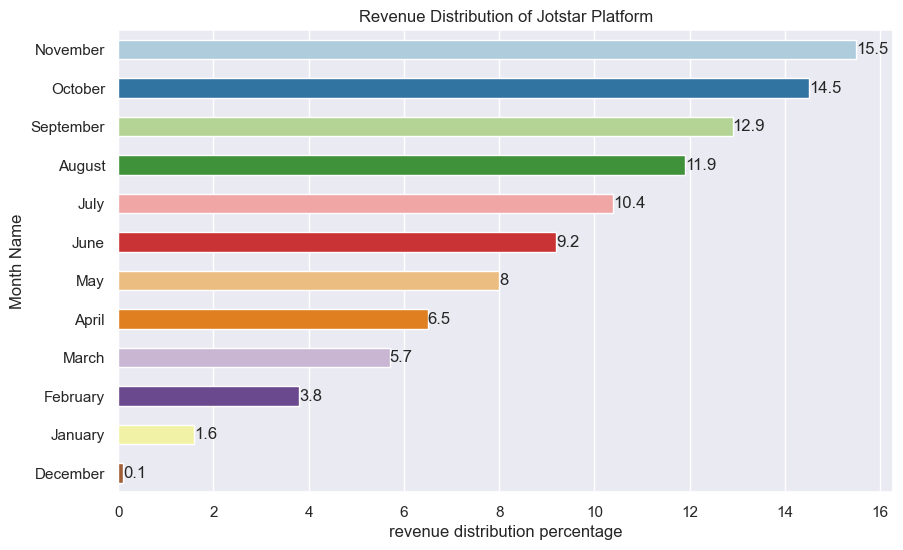

In [81]:
sns.set_theme(rc={'figure.figsize': (10, 6)})
ax = sns.barplot(data=revenue_jotstar, x=revenue_jotstar['revenue distribution percentage'], y=revenue_jotstar['Month Name'],hue=revenue_jotstar['Month Name'],errorbar=None,palette='Paired', width=0.5, orient='h')
plt.title('Revenue Distribution of Jotstar Platform')
for i in ax.containers:
    ax.bar_label(i,)


## Liocinema Revenue Analysis

In [82]:
Liocinema_subscribers_revenue = Liocinema_subscribers.copy().drop(columns=['is_active'])
Liocinema_subscribers_revenue

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan
0,UIDLC00000bea68a,25-34,Tier 3,2024-10-24,Free,NaT,NaN,NaN
1,UIDLC00009202848,18-24,Tier 1,2024-09-18,Basic,NaT,NaN,NaN
2,UIDLC0001086afc3,35-44,Tier 2,2024-03-23,Premium,NaT,2024-04-23,Free
3,UIDLC000186abd93,18-24,Tier 3,2024-09-07,Free,2024-10-23,NaN,NaN
4,UIDLC0002189b09f,18-24,Tier 2,2024-10-07,Premium,NaT,2024-11-07,Free
...,...,...,...,...,...,...,...,...
183441,UIDLCffff41ace17,18-24,Tier 2,2024-10-16,Free,2024-11-07,NaN,NaN
183442,UIDLCffff85ea59a,25-34,Tier 2,2024-08-09,Basic,NaT,NaN,NaN
183443,UIDLCffffbb55ff5,18-24,Tier 2,2024-11-22,Free,NaT,NaN,NaN
183444,UIDLCffffc6f6db0,18-24,Tier 1,2024-05-01,Basic,2024-10-10,NaN,NaN


FIND OUT ALL THE LATEST SUBSCRIPTION PLAN OF USERS SINCE THEY MAY HAVE CHANGED IT

In [83]:
Liocinema_subscribers_revenue['latest_subscription_plan'] = np.where(
    Liocinema_subscribers_revenue['new_subscription_plan'].isna(),
    Liocinema_subscribers_revenue['subscription_plan'],Liocinema_subscribers_revenue['new_subscription_plan'])
Liocinema_subscribers_revenue.head(15)

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan,latest_subscription_plan
0,UIDLC00000bea68a,25-34,Tier 3,2024-10-24,Free,NaT,NaN,NaN,Free
1,UIDLC00009202848,18-24,Tier 1,2024-09-18,Basic,NaT,NaN,NaN,Basic
2,UIDLC0001086afc3,35-44,Tier 2,2024-03-23,Premium,NaT,2024-04-23,Free,Free
3,UIDLC000186abd93,18-24,Tier 3,2024-09-07,Free,2024-10-23,NaN,NaN,Free
4,UIDLC0002189b09f,18-24,Tier 2,2024-10-07,Premium,NaT,2024-11-07,Free,Free
5,UIDLC000362cba39,25-34,Tier 3,2024-06-09,Free,2024-07-29,NaN,NaN,Free
6,UIDLC000436e2f4d,45+,Tier 3,2024-09-04,Premium,NaT,NaN,NaN,Premium
7,UIDLC00044a5d021,45+,Tier 2,2024-07-22,Free,2024-09-15,NaN,NaN,Free
8,UIDLC00044bbb294,25-34,Tier 2,2024-04-09,Free,NaT,2024-09-09,Basic,Basic
9,UIDLC00047bf87da,18-24,Tier 1,2024-10-29,Free,NaT,NaN,NaN,Free


TO FIND OUT THE ACTIVE DURATIONS MONTHS OF EACH SUBSCRIBERS ON RESPECTIVE PLANS

In [84]:
# Change datatype to datetype of plan change date

Liocinema_subscribers_revenue['plan_change_date'] = pd.to_datetime(Liocinema_subscribers_revenue['plan_change_date'])

# If users is having a last active date then use that otherwise consider November as their last acitve date

Liocinema_subscribers_revenue['subscription_end_date'] = np.where(
    Liocinema_subscribers_revenue['last_active_date'].isna(), np.datetime64('2024-11-30'), Liocinema_subscribers_revenue['last_active_date'])


# Duration of Active Months of each user
Liocinema_subscribers_revenue['Active_Months'] = (Liocinema_subscribers_revenue['subscription_end_date'].dt.month - Liocinema_subscribers_revenue['subscription_date'].dt.month) + 1


Liocinema_subscribers_revenue.head(20)

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan,latest_subscription_plan,subscription_end_date,Active_Months
0,UIDLC00000bea68a,25-34,Tier 3,2024-10-24,Free,NaT,NaT,NaN,Free,2024-11-30,2
1,UIDLC00009202848,18-24,Tier 1,2024-09-18,Basic,NaT,NaT,NaN,Basic,2024-11-30,3
2,UIDLC0001086afc3,35-44,Tier 2,2024-03-23,Premium,NaT,2024-04-23,Free,Free,2024-11-30,9
3,UIDLC000186abd93,18-24,Tier 3,2024-09-07,Free,2024-10-23,NaT,NaN,Free,2024-10-23,2
4,UIDLC0002189b09f,18-24,Tier 2,2024-10-07,Premium,NaT,2024-11-07,Free,Free,2024-11-30,2
5,UIDLC000362cba39,25-34,Tier 3,2024-06-09,Free,2024-07-29,NaT,NaN,Free,2024-07-29,2
6,UIDLC000436e2f4d,45+,Tier 3,2024-09-04,Premium,NaT,NaT,NaN,Premium,2024-11-30,3
7,UIDLC00044a5d021,45+,Tier 2,2024-07-22,Free,2024-09-15,NaT,NaN,Free,2024-09-15,3
8,UIDLC00044bbb294,25-34,Tier 2,2024-04-09,Free,NaT,2024-09-09,Basic,Basic,2024-11-30,8
9,UIDLC00047bf87da,18-24,Tier 1,2024-10-29,Free,NaT,NaT,NaN,Free,2024-11-30,2


CHECK THE SUBSCRIPTION PLAN STATUS WHETHER IT IS CHANGED OR NOT

In [85]:
plan_tiers = {'Free':0, 'Basic':1,'Premium':2}
Liocinema_subscribers_revenue['plan_change_status']  = np.where(
    (Liocinema_subscribers_revenue['new_subscription_plan'].notna()) &
    (Liocinema_subscribers_revenue['subscription_plan'].map(plan_tiers) <
     Liocinema_subscribers_revenue['new_subscription_plan'].map(plan_tiers)),
     'Upgrade',
     np.where(
         (Liocinema_subscribers_revenue['new_subscription_plan'].notna()) &
         (Liocinema_subscribers_revenue['subscription_plan'].map(plan_tiers) >
          Liocinema_subscribers_revenue['new_subscription_plan'].map(plan_tiers)),
          'Downgrade',
          'No Change'
     )
)

Liocinema_subscribers_revenue

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan,latest_subscription_plan,subscription_end_date,Active_Months,plan_change_status
0,UIDLC00000bea68a,25-34,Tier 3,2024-10-24,Free,NaT,NaT,NaN,Free,2024-11-30,2,No Change
1,UIDLC00009202848,18-24,Tier 1,2024-09-18,Basic,NaT,NaT,NaN,Basic,2024-11-30,3,No Change
2,UIDLC0001086afc3,35-44,Tier 2,2024-03-23,Premium,NaT,2024-04-23,Free,Free,2024-11-30,9,Downgrade
3,UIDLC000186abd93,18-24,Tier 3,2024-09-07,Free,2024-10-23,NaT,NaN,Free,2024-10-23,2,No Change
4,UIDLC0002189b09f,18-24,Tier 2,2024-10-07,Premium,NaT,2024-11-07,Free,Free,2024-11-30,2,Downgrade
...,...,...,...,...,...,...,...,...,...,...,...,...
183441,UIDLCffff41ace17,18-24,Tier 2,2024-10-16,Free,2024-11-07,NaT,NaN,Free,2024-11-07,2,No Change
183442,UIDLCffff85ea59a,25-34,Tier 2,2024-08-09,Basic,NaT,NaT,NaN,Basic,2024-11-30,4,No Change
183443,UIDLCffffbb55ff5,18-24,Tier 2,2024-11-22,Free,NaT,NaT,NaN,Free,2024-11-30,1,No Change
183444,UIDLCffffc6f6db0,18-24,Tier 1,2024-05-01,Basic,2024-10-10,NaT,NaN,Basic,2024-10-10,6,No Change


In [86]:
Liocinema_subscribers_revenue.groupby('latest_subscription_plan')['user_id'].count().reset_index()

,latest_subscription_plan,user_id
0,Basic,46880
1,Free,119947
2,Premium,16619


In [87]:
Liocinema_subscribers_revenue.groupby(['latest_subscription_plan','Active_Months'])['user_id'].count().unstack().fillna(0).drop(index=['Free']).reset_index()

Active_Months,latest_subscription_plan,1,2,3,4,5,6,7,8,9,10,11,12
0,Basic,8605,14671,8714,3697,2769,2434,1762,1493,1119,934,661,21
1,Premium,3924,4800,2891,1279,1074,879,426,561,373,258,146,8


In [88]:
Liocinema_Revenue_Analysis = Liocinema_subscribers_revenue.groupby(['plan_change_status','Active_Months','latest_subscription_plan'])['user_id'].count().unstack().fillna(0).drop(columns=['Free']).reset_index()
Liocinema_Revenue_Analysis.head(50)

latest_subscription_plan,plan_change_status,Active_Months,Basic,Premium
0,Downgrade,1,360.0,0.0
1,Downgrade,2,327.0,0.0
2,Downgrade,3,345.0,0.0
3,Downgrade,4,340.0,0.0
4,Downgrade,5,358.0,0.0
5,Downgrade,6,277.0,0.0
6,Downgrade,7,357.0,0.0
7,Downgrade,8,209.0,0.0
8,Downgrade,9,193.0,0.0
9,Downgrade,10,184.0,0.0


In [89]:
Liocinema_Revenue_Analysis['Monthly Basic Price'] = Liocinema_Revenue_Analysis['Basic'] * Liocinema_basic_plan
Liocinema_Revenue_Analysis['Monthly Premium Price'] = Liocinema_Revenue_Analysis['Premium'] * Liocinema_premium_plan

Liocinema_Revenue_Analysis['Total Revenue'] = (Liocinema_Revenue_Analysis['Monthly Basic Price'] + Liocinema_Revenue_Analysis['Monthly Premium Price']) * Liocinema_Revenue_Analysis['Active_Months']

Liocinema_Revenue_Analysis['Month Name'] = Liocinema_Revenue_Analysis['Active_Months'].map(Month)

Liocinema_Revenue_Analysis

latest_subscription_plan,plan_change_status,Active_Months,Basic,Premium,Monthly Basic Price,Monthly Premium Price,Total Revenue,Month Name
0,Downgrade,1,360.0,0.0,34560.0,0.0,34560.0,January
1,Downgrade,2,327.0,0.0,31392.0,0.0,62784.0,February
2,Downgrade,3,345.0,0.0,33120.0,0.0,99360.0,March
3,Downgrade,4,340.0,0.0,32640.0,0.0,130560.0,April
4,Downgrade,5,358.0,0.0,34368.0,0.0,171840.0,May
5,Downgrade,6,277.0,0.0,26592.0,0.0,159552.0,June
6,Downgrade,7,357.0,0.0,34272.0,0.0,239904.0,July
7,Downgrade,8,209.0,0.0,20064.0,0.0,160512.0,August
8,Downgrade,9,193.0,0.0,18528.0,0.0,166752.0,September
9,Downgrade,10,184.0,0.0,17664.0,0.0,176640.0,October


In [90]:
print('Total Revenue of Liocinema: ')
Liocinema_Revenue_Analysis['Total Revenue'].sum()

Total Revenue of Liocinema: 


22065162.0

In [91]:
revenue_liocinema = Liocinema_Revenue_Analysis.groupby('Month Name')['Total Revenue'].sum().reset_index().sort_values(by='Total Revenue', ascending=False)
revenue_liocinema['revenue distribution percentage'] = round((revenue_liocinema['Total Revenue'] / revenue_liocinema['Total Revenue'].sum())*100,1)
revenue_liocinema

,Month Name,Total Revenue,revenue distribution percentage
3,February,4055232.0,18.4
7,March,3628449.0,16.4
6,June,2082330.0,9.4
0,April,2079612.0,9.4
8,May,2021850.0,9.2
1,August,1725576.0,7.8
5,July,1568742.0,7.1
11,September,1399869.0,6.3
4,January,1332276.0,6.0
10,October,1229460.0,5.6


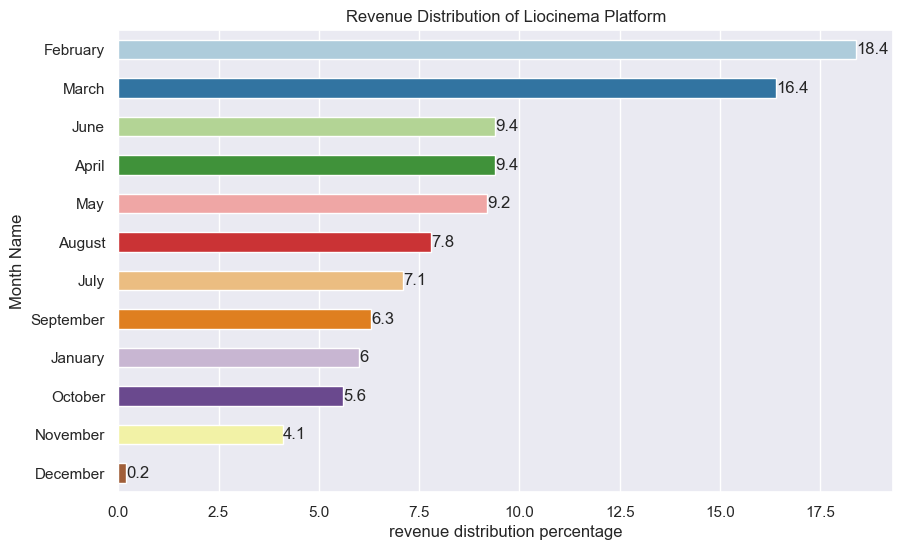

In [92]:
sns.set_theme(rc={'figure.figsize': (10, 6)})
ax = sns.barplot(data=revenue_liocinema, x=revenue_liocinema['revenue distribution percentage'], y=revenue_liocinema['Month Name'],hue=revenue_liocinema['Month Name'],errorbar=None,palette='Paired', width=0.5, orient='h')
plt.title('Revenue Distribution of Liocinema Platform')
for i in ax.containers:
    ax.bar_label(i,)